## Solving symbolic problems with Sympy

[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/mechanics-thermodynamics/mechanics-sympy.ipynb)

Sympy can be used as a CAS tool to solve symbolic expressions. Most equations encountered in introductory clasissical mechanical problems can be solved with pen and paper. But there are e.g. certain complicated integrals, where a table with integral-solutions is needed. In these cases sympy can be used to evaluate the integrals. 
Furthermore sympy can be used to solve equations and differential equations (which have analytical solutions).

Sympy can also be used by students to validate the solutions obtained with pen and paper, to simplify symbolic expressions and to evaluate a symbolic expressions at a specific point. 

### Problem - integration

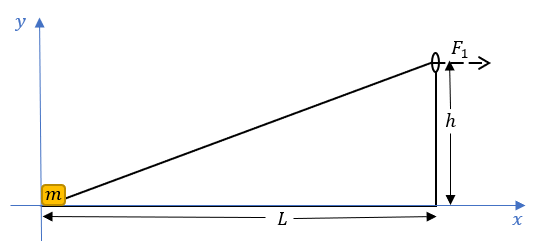

An object with mass $m$ is in rest on a frictionless surface. The object is attached to a massless and unstrechable rope, which goes through a frictionless hoop and is pulled with a constant force $\overrightarrow{F_1} = F_1 \hat{x}$. The hoop is placed in a height $h$ and a horizontal distance $L$ from the object. The force applied to the rope accelerates the object, until it hits a wall in $x = L$. What is the velocity of the object, when it hits the wall in $x = L$?
Evaluate the answer for $m = 0.05$ kg, $L = 10$ m, $h = 1.5$ m and $F_1$ = 10 N.

### Solution and code

Before the object hits the wall it is only accelerated in the $x$-direction, so only the $x$-component of the force $\overrightarrow{F}$ on the object contributes to the acceleration. The magnitude of the force $\overrightarrow{F}$ on the object is $F_1$.

The magnitude of the $x$-component of the force depends on the $x$-position of the object and is given as

$$F_x(x) = F_1 \frac{L-x}{\sqrt{(L-x)^2 + h^2}} \,.$$

The final velocity can be computed from the work the force $\overrightarrow{F}$ does on the object, as 
$$ W = \Delta E_{kin} = E_f - E_i = E_f = \frac{1}{2} m v_f^2.$$

The work done on the object is given as
$$W = \int_0^L F_x \, dx \,.$$

Hence the final velocity can be calculated by solving the equation
$$W = \int_0^L F_x \, dx = \frac{1}{2} m v_f^2 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, (1)$$

'W = '

F1*h*sqrt(L**2/h**2 + 1) - F1*h

'v_f ='

1.4142135623731*sqrt(F1*h*(((L**2 + h**2)/h**2)**0.5 - 1.0)/m)

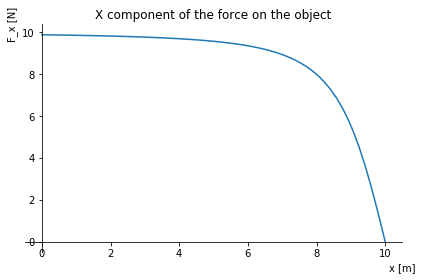

In [24]:
# Import methods from sympy (or import the entire sympy library with "from sympy import*")
from sympy import sqrt, symbols, integrate, Eq, solve, evalf

# Define symbols
x, F1, L, h, v, m = symbols("x, F1, L, h, v, m")

# Define the x-component of the force on the object
Fx = F1 * (L-x) / sqrt((L-x)**2 + h**2)

# Calculate the work done on the object using sympy.integrate
W = integrate(Fx, (x, 0, L))
display("W = ", W) 

# Compute the velocity by solving equation (1) using sympy.Eq and sympy.solve
E_kin = 1/2 * m * v**2

eq = Eq(E_kin, W)
v_f = solve(eq, v)

# v_f contains two solutions, but we only want the positive one
v_f1 = v_f[1]

# Simplify simplifies the expression to the "simplest form" (there is no clear-cut definition of "simplest", though.)
display("v_f =", v_f1.simplify())


# The expression v_f can be evaluated for specific values of the physical quantities using subs, to substitute the symbol
# with a specific value. The sympy.evalf method approximates the solution as a decimal number, which can be rounded
# to a specified number of decimals using round. 
L_, h_, F1_, m_ = 10, 1.5, 10, 0.05

v_f2 = v_f1.subs(L, L_).subs(h, h_).subs(F1, F1_).subs(m, m_)


# It is also possible to plot a function. Below the force F_x is plotted as a function of x for specific values of L, h and m
Fx_ = F1_ * (L_ - x) / sqrt((L_ - x)**2 + h_**2)
plot(Fx_, (x, 0, L_), title = "X component of the force on the object", xlabel = "x [m]", ylabel = "F_x [N]")